### Different Scenarios

Run imports:

In [ ]:
import visualizer
from self_driving_cars import DynamicSingleTrackModel
%matplotlib notebook
%matplotlib inline
#
car = DynamicSingleTrackModel(
    
)

# for i in range(10):
#     print(road.get_tangent_angle_at(i * road.length/10))
    # print(road.get_global_position(i * road.length/10, 0))

#### Benchmarks

Progress: [████████████████████████████████████████████████████████████-] 99.95%  of the Road Complete, current state: Global Position x: 73.54, Global Postion y: 89.24, Steering Angle: -0.02, Velocity: 24.18, Orientation: 0.01, Yaw Rate: -0.45, Slip Angle: -0.01, planned next 33.33ms in 0.65ms            
reached end of road



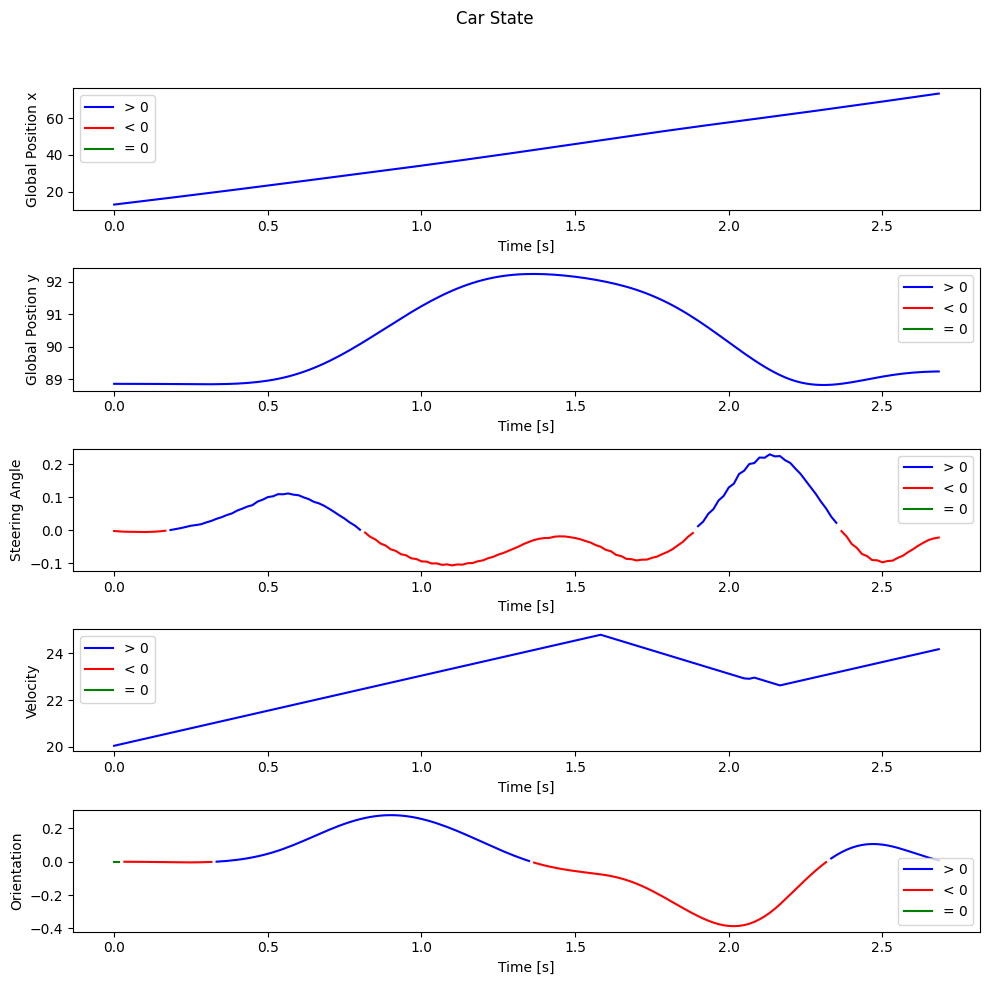

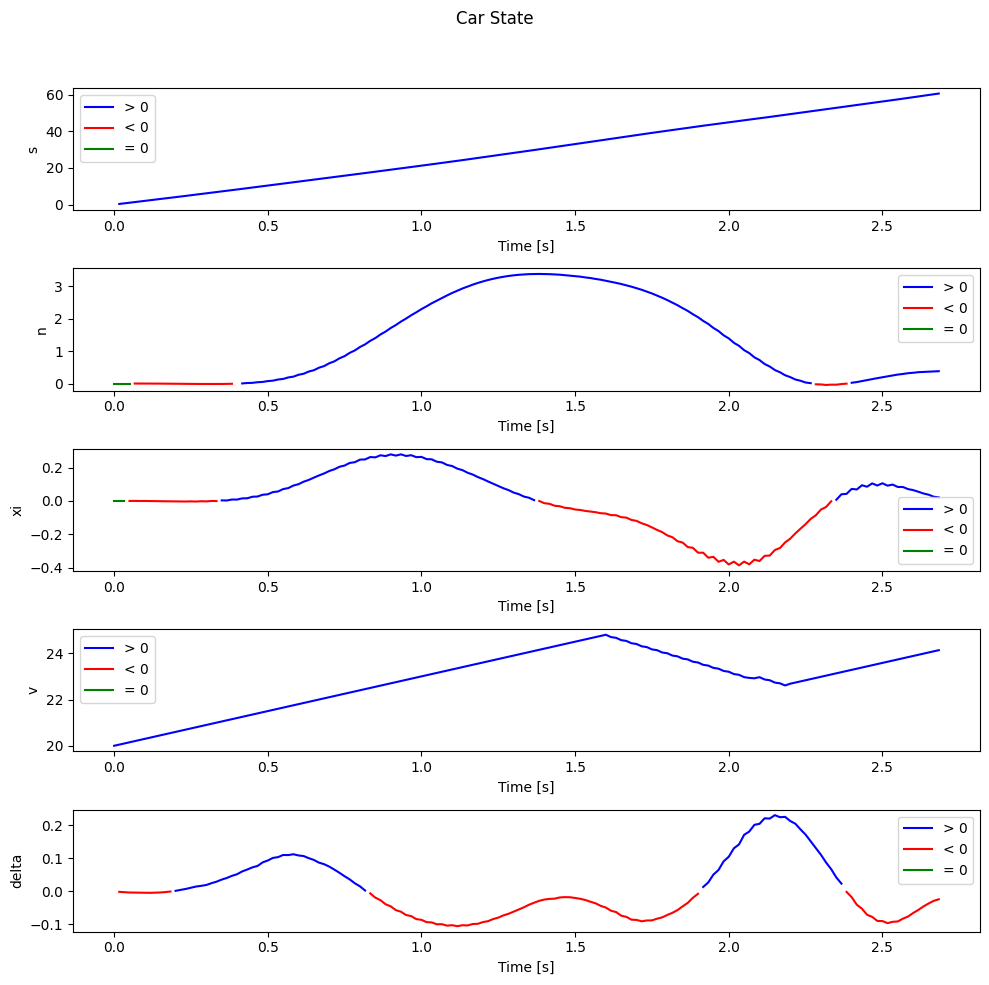

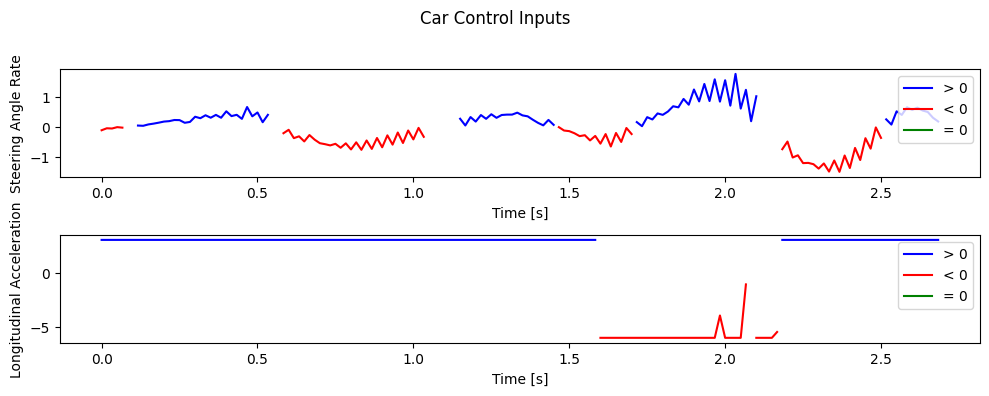

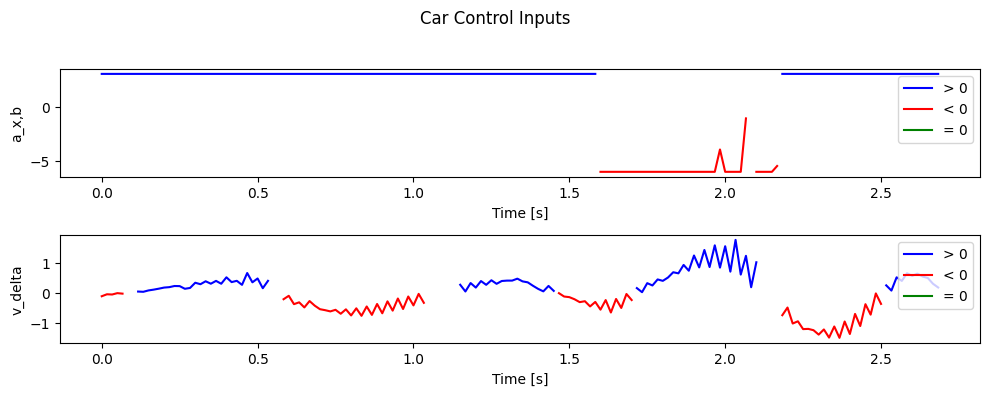

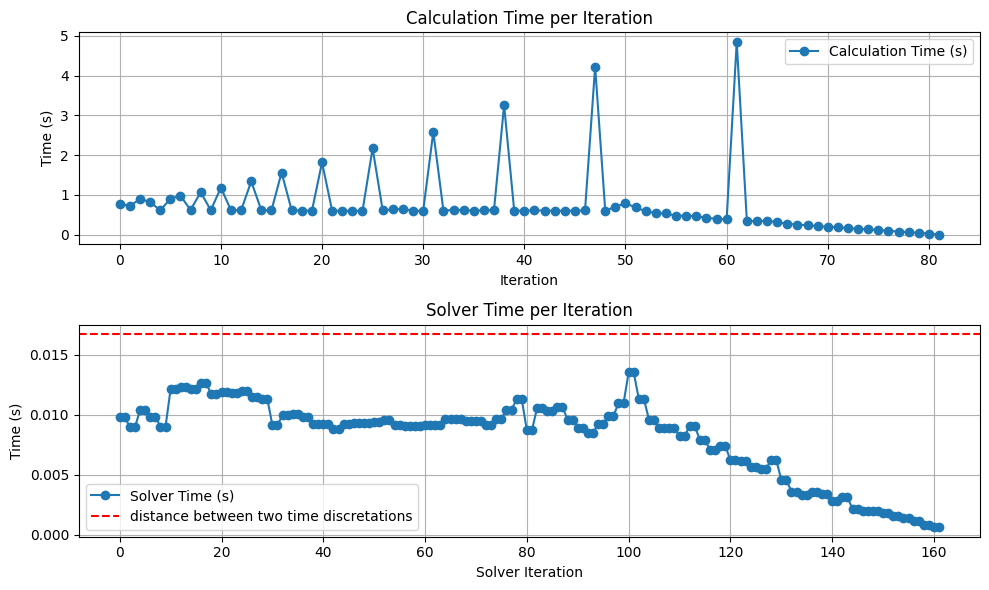

In [1]:
import benchmark
from path_planner import Objectives
%matplotlib notebook
%matplotlib inline
# TODO: solver currently adds v >= 2 as a constraint on the states
cfg = benchmark.config
benchmarks = benchmark.run(
    benchmark.BenchmarkConfiguration(
        start_velocity=20,
        start_offset=cfg.LateralOffset.Mid,
        velocity_range=(1, 1.5),
        road=cfg.Road.ElchTest_One,
        time_horizon=cfg.TimeHoriozon.Short,
        time_discretization=1/60,
        models=[
            # (cfg.Model.RoadAlignedModel, cfg.SolverType.Convex),
            # (cfg.Model.RoadAlignedModel, cfg.SolverType.NonConvex),
            (cfg.Model.OrientedRoadFollowingModel, cfg.SolverType.Convex),
            # (cfg.Model.OrientedRoadFollowingModel, cfg.SolverType.NonConvex)
        ],
        objective=Objectives.speed_up,
    ),
    # stop=True,
)

for benchmark in benchmarks:
    # benchmark.car.predictive_model.plot_additional_information([], [])
    display(benchmark.animation)
    benchmark.plot_car_states()
    benchmark.plot_predictive_car_states()
    benchmark.plot_controls()
    benchmark.plot_predictive_controls()
    benchmark.car.plot_metrics()
    # scenario.plot_controls()
    # print(scenario.model.road.length)
    # print(scenario.actual_car_states[-1])


#### Small-Angle-Approximation

In [ ]:
import numpy as np
visualizer.plot_with_bounds(
    y_labels=['tan(x)', 'x'],
    y_values_list=[
        [np.tan(x), x]
        for x in np.linspace(-1, 1, 1000)
    ],
    x_values=np.linspace(-1, 1, 1000),
    no_bounds=True,
    y_label='tan approximation',
)

#### Visualize McCormick

In [ ]:
x_bounds=(-2, 3)
y_bounds=(4, 10)

visualizer.visualize_mccormick(x_bounds, y_bounds)
visualizer.visualize_mccormick_2d_interactive(x_bounds, y_bounds)